## 第13章 質的変数間の連関を視覚化したい -コレスポンデンス分析

- 多数の質的変数の連関について大まかに把握したい場合に有効  
- クロス集計表において, 両変数のカテゴリ間の対応関係を視覚的に把握
- 2重クロス集計表に適用する手法をコレスポンデンス分析(CA)
- カテゴリカルデータ行列や多重クロス集計表に適用する手法を多重コレスポンデンス分析(MCA)

#### コレスポンデンス分析の特徴(対数線形モデルの比較して)
- 出力が視覚的に与えられることで, 考察したい変数が増えても直感的に理解しやすい
- 考察が主観的になりやすい
- 変数間の連関構造の探索に有効

#### 分析の流れ
1. 分析手法の選択(多重 or not)
2. 分析の実行と次元の確認
3. バイプロットの描画と選択

In [1]:
#データ概要

b3dat <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_13/bicycle3.csv", row.names=1)
head(b3dat)

メーカー,ブランド力,コスパ,技術力,レース実績,デザイン
イシドロ,D,B,A,C,D
イシドロ,D,A,D,C,D
ピロリロ,B,D,B,C,A
ピロリロ,C,D,B,B,C
デロンザ,B,C,C,C,B
デロンザ,C,C,C,C,C


Aに近いほど評価が高く, Dに近いほど評価が低いことを示す.

In [2]:
#「メーカー」「ブランド力」「技術力」の3重クロス集計表
xtabs(~メーカー+ブランド力+技術力, data=b3dat)

, , 技術力 = A

          ブランド力
メーカー    A  B  C  D
  イシドロ  3  3  4 12
  クォーク  1  4  8 15
  コレナゴ  2  0  0  0
  チネッロ  3  0  0  0
  デロンザ  0  0  0  1
  ビアンカ  2  2  0  0
  ピロリロ  1  6  2  2

, , 技術力 = B

          ブランド力
メーカー    A  B  C  D
  イシドロ  1  0  3  4
  クォーク  2  1  3  4
  コレナゴ  9  8  1  1
  チネッロ  3  1  1  0
  デロンザ  3  6  3  0
  ビアンカ  2  3  1  2
  ピロリロ  6 16  3  3

, , 技術力 = C

          ブランド力
メーカー    A  B  C  D
  イシドロ  0  1  0  1
  クォーク  0  0  1  4
  コレナゴ  9  0  1  0
  チネッロ  5  5  0  0
  デロンザ 15  6  3  1
  ビアンカ  7 15  3  2
  ピロリロ  0  2  0  1

, , 技術力 = D

          ブランド力
メーカー    A  B  C  D
  イシドロ  1  0  0  3
  クォーク  0  3  0  6
  コレナゴ  3  2  0  1
  チネッロ 15  6  1  3
  デロンザ  2  0  1  0
  ビアンカ  0  3  2  1
  ピロリロ  0  2  2  0


### 13.2 コレスポンデンス分析

In [3]:
#2重クロス集計表の読み込み
b2dat <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_13/bicycle2.csv", row.names=1)
b2dat

,ブランド力,コスパ,技術力,レース実績,デザイン
コレナゴ,41,11,67,51,54
デロンザ,84,21,54,23,82
ピロリロ,54,32,72,83,42
ビアンカ,32,43,42,34,92


In [4]:
#パッケージの読み込み
library(FactoMineR)

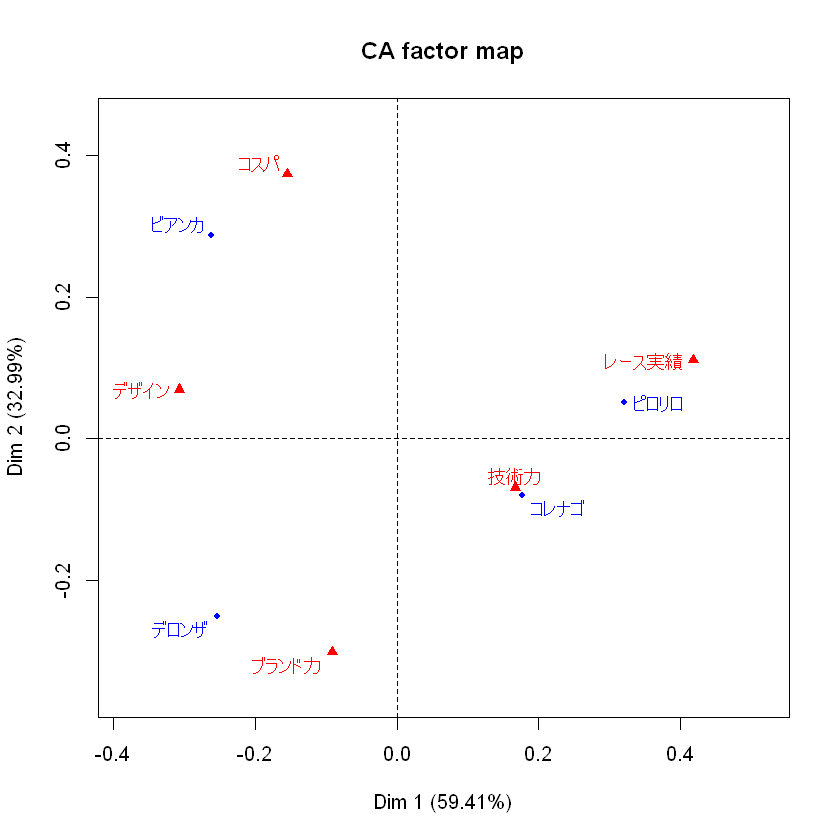

In [5]:
#コレスポンデンス分析の実行
resb2dat <- CA(b2dat)

In [6]:
#固有値の出力
resb2dat$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.068929372,59.408164,59.40816
dim 2,0.038273069,32.986414,92.39458
dim 3,0.008824326,7.605422,100.00000


In [7]:
#行スコアと列スコアの出力(座標情報をスコアと呼ぶ)

resb2dat$row$coord    #行スコアの出力
resb2dat$col$coord    #列スコアの出力

,Dim 1,Dim 2,Dim 3
コレナゴ,0.1770967,-0.07957513,-0.16014501
デロンザ,-0.2535313,-0.25110976,0.04797783
ピロリロ,0.3213132,0.05081911,0.09476861
ビアンカ,-0.2620124,0.28697941,-0.01486906


,Dim 1,Dim 2,Dim 3
ブランド力,-0.09150627,-0.30107873,0.10624583
コスパ,-0.15522470,0.37346361,0.16307907
技術力,0.16702061,-0.06915502,-0.08788395
レース実績,0.41800578,0.11083332,0.01651650
デザイン,-0.30804475,0.06907138,-0.08284909


In [8]:
#summaryの出力
summary(resb2dat)


Call:
CA(X = b2dat) 

The chi square of independence between the two variables is equal to 117.6511 (p-value =  1.815039e-19 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3
Variance               0.069   0.038   0.009
% of var.             59.408  32.986   7.605
Cumulative % of var.  59.408  92.395 100.000

Rows
           Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
コレナゴ |    13.993 |  0.177 10.051  0.495 | -0.080  3.655  0.100 | -0.160
デロンザ |    33.751 | -0.254 24.279  0.496 | -0.251 42.894  0.486 |  0.048
ピロリロ |    32.041 |  0.321 41.802  0.899 |  0.051  1.883  0.022 |  0.095
ビアンカ |    36.241 | -0.262 23.868  0.454 |  0.287 51.568  0.545 | -0.015
            ctr   cos2  
コレナゴ 64.203  0.405 |
デロンザ  6.791  0.018 |
ピロリロ 28.405  0.078 |
ビアンカ  0.600  0.001 |

Columns
             Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
ブランド力 |    22.954 | -0.092  2.528  0.076 | -0.301 49.285  0.822 |  0.106
コスパ     |    20.067 | -0.155  3.689  0.

```Iner*1000```  
あるカテゴリが多次元空間上の重心からどれだけずれているかの指標である慣性(inertia)に1000を乗じた値  
この値が大きいほど, そのカテゴリはバイプロットジュの原点から遠い場所に位置していると解釈できる  

```ctr```  
各カテゴリの軸への寄与率(contribution)で, 値が大きいカテゴリほど, その軸に強く寄与している

```cos2```  
軸が各カテゴリにどの程度寄与しているかを表す指標であり, 「平方相関」と呼ばれる  
平方相関が高いカテゴリほど, 軸によってよく説明されている

### 13.3 報告例

　「メーカー」と「観点」の連関を詳細に検討するため, コレスポンデンス分析を実行した. 第2軸までの累積寄与率は92.4%であり, データが持つ情報のほとんどが平面上に集約されていると解釈することが出来る.  
　次に軸の解釈を行う. 「観点」のカテゴリに注目すると, 第1軸に高い寄与を持っているのは「レース実績」(47.748)と「デザイン」(36.656)である. また, 平方相関の観点からは, 「技術力」は第1軸によってよく説明されている(0.690). バイプロットを合わせて参照すると, 第1軸の右には「レース実績」と「技術力」に優れたメーカー, 左には「デザイン」が良いメーカーが配置されているものと解釈できる. 具体的には, "ピロリロ", "コレナゴ"は相対的にレース実績や技術力に優れたメーカーで, "デロンザ", "ビアンカ"はデザインが良いメーカーであると考えられる.  
 第2軸に高い寄与を持っているのは「ブランド力」(49.285)と「コスパ」(38.455)である. 第2軸の上部には「コスパ」が良いメーカー, 下部には「ブランド力」の高いメーカーが配置されるものと解釈できる. バイプロットを参照すると, "ビアンカ"は他のメーカーに対してコストパフォーマンスの点で優位であり, "デロンザ"はブランド力の点で優位であると考えられる.  
　ところで, "ピロリロ"と"コレナゴ"は「レース実績」と「技術力」の2つの観点において近い評価を得ているが, 「デザイン」「コスパ」からはやや遠く布置されている. "ピロリロ"と"コレナゴ"は技術を先鋭化させ, 勝ちにこだわるハイエンドの自転車を開発しているメーカーであると考えられる.  
　次に, "デロンザ"は「ブランド力」の近くに布置されているが, 「コスパ」「レース実績」「技術力」からは遠くなっている. このメーカーはブランド力は高いが, 性能に比して効果であるとみなせる. 最新の技術を搭載した勝ちにこだわる自転車を作らなくても, ブランド力の高さでその存在を認められているメーカーかもしれない.  
　最後に, "ビアンカ"は「コスパ」と「デザイン」の近くに布置されている. 「ブランド力」も「レース実績」も「技術力」もそれほど優れていないが, コストパフォーマンスと, 気の利いたデザインで支持を得ているメーカーと考えられる.
 

### 13.4 クラスター分析の併用

(2重)クロス集計表を多変量データ行列とみなし, 各評価観点の度数のパターンから4つのメーカーをクラスタリングすることを考える.

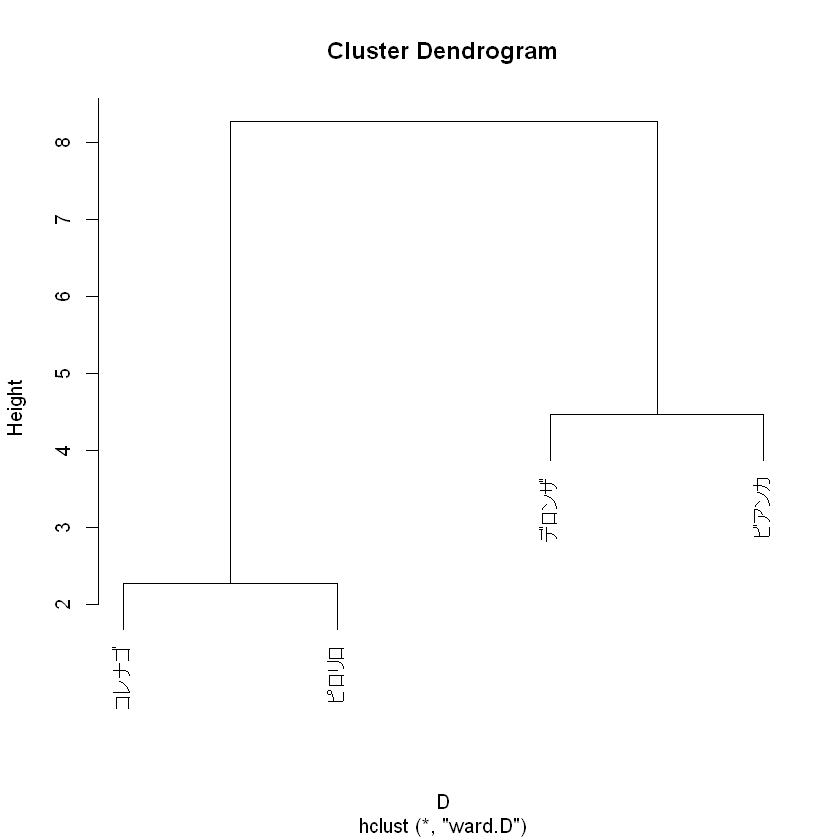

In [9]:
#「メーカー」のクラスター分析

z <- scale(b2dat)    #列方向にz得点化

#平方ユークリッド距離
DO <- dist(z, method="euclidian")
D <- (1/2)*DO^2

#階層的クラスター分析
resclust <- hclust(D, method="ward.D")
plot(resclust)    #デンドログラムの描画

In [10]:
#クラスターの解釈
clus <- cutree(resclust, k=2)    #クラスター番号の取得
clus

b2dat$cluster <- clus
by(b2dat[, -6], b2dat$cluster, apply, 2, mean)    #クラスター別の平均値の算出

コレナゴ デロンザ ピロリロ ビアンカ 
       1        2        1        2

b2dat$cluster: 1
ブランド力     コスパ     技術力 レース実績   デザイン 
      47.5       21.5       69.5       67.0       48.0 
------------------------------------------------------------ 
b2dat$cluster: 2
ブランド力     コスパ     技術力 レース実績   デザイン 
      58.0       32.0       48.0       28.5       87.0 

クラスタリングを行うことで, バイプロットの解釈がしやすくなるメリットがある.  
行列を入れ替えることで, 列カテゴリも同様にクラスタリングすることが可能.

### 13.5 多重コレスポンデンス分析

In [11]:
#分析対象のデータの形式
head(b3dat)
str(b3dat)

メーカー,ブランド力,コスパ,技術力,レース実績,デザイン
イシドロ,D,B,A,C,D
イシドロ,D,A,D,C,D
ピロリロ,B,D,B,C,A
ピロリロ,C,D,B,B,C
デロンザ,B,C,C,C,B
デロンザ,C,C,C,C,C


'data.frame':	300 obs. of  6 variables:
 $ メーカー  : Factor w/ 7 levels "イシドロ","クォーク",..: 1 1 7 7 5 5 6 5 6 4 ...
 $ ブランド力: Factor w/ 4 levels "A","B","C","D": 4 4 2 3 2 3 2 2 2 1 ...
 $ コスパ    : Factor w/ 4 levels "A","B","C","D": 2 1 4 4 3 3 1 2 3 3 ...
 $ 技術力    : Factor w/ 4 levels "A","B","C","D": 1 4 2 2 3 3 3 2 3 3 ...
 $ レース実績: Factor w/ 4 levels "A","B","C","D": 3 3 3 2 3 3 1 3 3 4 ...
 $ デザイン  : Factor w/ 4 levels "A","B","C","D": 4 4 1 3 2 3 2 2 2 4 ...


#### カテゴリカルデータ行列をダミーデータ行列に変換し, CA関数で(多重)コレスポンデンス分析を行った場合

In [12]:
#dummiesパッケージの読み込み
library(dummies)

dummies-1.5.6 provided by Decision Patterns



In [13]:
#カテゴリカルデータ行列のダミーデータ行列への変換
db3dat <- dummy.data.frame(b3dat, sep=":")    #dummie.data.frame関数の実行
head(db3dat)

メーカー:イシドロ,メーカー:クォーク,メーカー:コレナゴ,メーカー:チネッロ,メーカー:デロンザ,メーカー:ビアンカ,メーカー:ピロリロ,ブランド力:A,ブランド力:B,ブランド力:C,...,技術力:C,技術力:D,レース実績:A,レース実績:B,レース実績:C,レース実績:D,デザイン:A,デザイン:B,デザイン:C,デザイン:D
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,4.222986e-01,1.206567e+01,12.06567
dim 2,3.484257e-01,9.955021e+00,22.02069
dim 3,3.229287e-01,9.226534e+00,31.24723
dim 4,2.624222e-01,7.497778e+00,38.74501
dim 5,2.308917e-01,6.596905e+00,45.34191
dim 6,2.079285e-01,5.940813e+00,51.28273
dim 7,1.875809e-01,5.359454e+00,56.64218
dim 8,1.633606e-01,4.667445e+00,61.30963
dim 9,1.608702e-01,4.596290e+00,65.90592
dim 10,1.467147e-01,4.191848e+00,70.09776


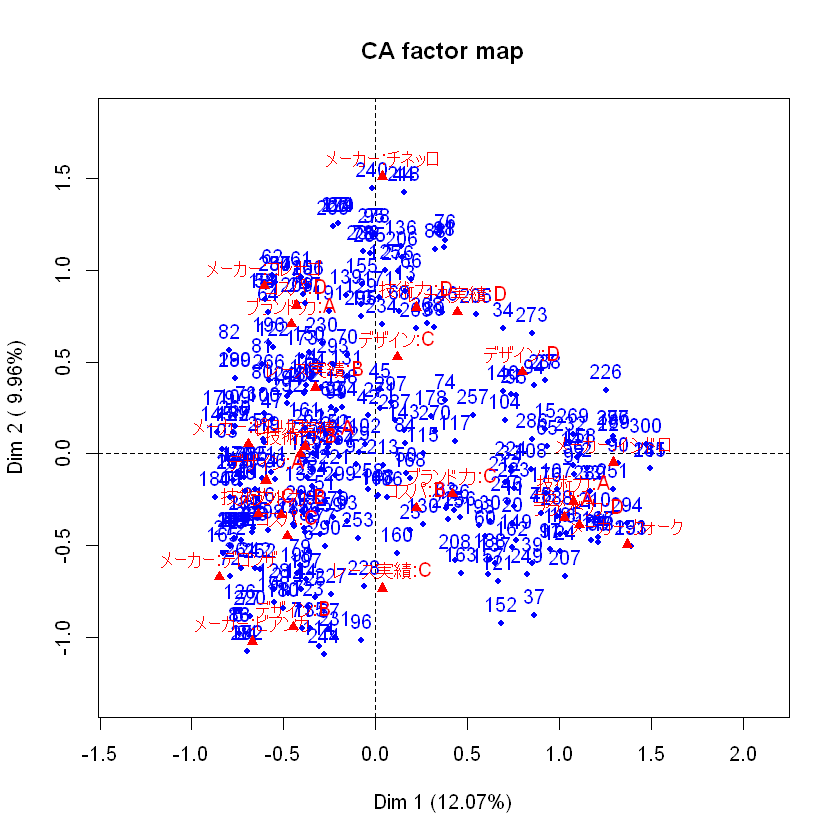

In [14]:
#CAによる(多重)コレスポンデンス分析
resdb3dat <- CA(db3dat)
resdb3dat$eig

サンプルが多い場合, バイプロットの視認性は悪くなる.  
引数```invisible```に```"row"``` or ```"col"```を指定することで, 列(行)カテゴリのみをプロット可能.

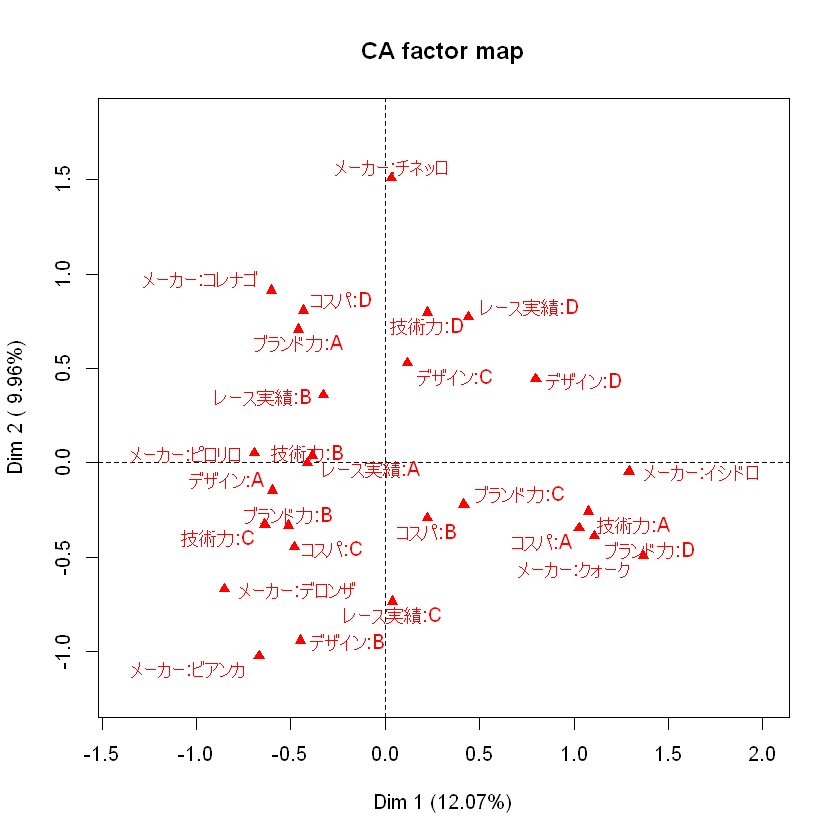

In [15]:
#列カテゴリのみをプロット
plot(resdb3dat, invisible = "row")
#plot(resdb3dat, invisible="col")    #行カテゴリのみをプロット

#### 13.5.3 様々なデータ形式からの多重コレスポンデンス分析の実行

#### カテゴリカルデータ行列から行う多重コレスポンデンス分析

In [16]:
#MCAによる多重コレスポンデンス分析
resb3dat <- MCA(b3dat)

#### 多重クロス集計表のデータから行う多重コレスポンデンス分析

多重クロス集計表をデータフレーム化することで, 行にセルの情報が配置された形式になる.

In [17]:
#データフレームへの変換

#多重クロス集計表の作成
crosb3dat <- xtabs(~., data=b3dat)

#データフレームへの変換
crosdf <- as.data.frame(crosb3dat)
head(crosdf)

#行数の確認
nrow(crosdf)

メーカー,ブランド力,コスパ,技術力,レース実績,デザイン,Freq
イシドロ,A,A,A,A,A,0
クォーク,A,A,A,A,A,0
コレナゴ,A,A,A,A,A,0
チネッロ,A,A,A,A,A,0
デロンザ,A,A,A,A,A,0
ビアンカ,A,A,A,A,A,0


[1] 7168

多重クロス集計表のデータから多重コレスポンデンス分析を行うには, 度数が0のセルを除外する必要がある.

In [18]:
#度数が0のセルを除外
crosdf2 <- crosdf[which(crosdf[,7]>=1), ]    #度数が1以上の行だけを選択
nrow(crosdf2)    #行数の確認
head(crosdf2)

[1] 253

,メーカー,ブランド力,コスパ,技術力,レース実績,デザイン,Freq
22,イシドロ,D,A,A,A,A,2
49,ピロリロ,C,B,A,A,A,1
91,ピロリロ,A,D,A,A,A,1
98,ピロリロ,B,D,A,A,A,1
126,ピロリロ,B,A,B,A,A,1
140,ピロリロ,D,A,B,A,A,1


whichの返り値は論理型ではなく, int型(条件式がTRUEとなった要素の番号)

In [19]:
#MCAによる多重コレスポンデンス分析
rescrosdf2 <- MCA(crosdf2, quanti.sup=7, row.w=crosdf2$Freq)

```quanti.sup```:量的変数が収められている列の番号  
```row.w``` &emsp;&emsp; :度数が収められているベクトル